# Frequent Pattern Mining from Hotel Booking Dataset

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The dataset used in this activity is called the __Hotel Booking Demand Dataset__ and is available at https://www.kaggle.com/code/marta99/hotel-booking-demand-eda-visualization. It consists of 119,000 records of bookings from two hotels in Portugal: a resort hotel and a city hotel, with 32 attributes for each record. The attributes consist of the booking details (e.g., lead time, arrival date,  number of nights), customer information (e.g., country, market segment, distribution channel), and reservation specifics (e.g., deposit type, special requests, cancellation status) and more. To simplify our analysis, we choose only the 79,3300 bookings for the city hotel in the dataset.

Attribute Descriptions
- market_segment: which customer group the booking belongs to. tells the source or type of customer.
- distribution_channel: which platform the booking was made
- previous_cancellations: number of times a customer cancelled a booking with the hotel in the past.
- previous_bookings_not_canceled: number of previous bookings of the same customer that were not canceled.
- adr (average daily rate): average income earned per occupied room per day from the booking.
- reservation_status: Check-Out, Canceled, or No-Show

## Data Cleaning

In [183]:
hotel = pd.read_csv('resources/hotel_bookings.csv')
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [184]:
bookings = hotel[hotel['hotel'] == 'City Hotel']
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79330 entries, 40060 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           79330 non-null  object 
 1   is_canceled                     79330 non-null  int64  
 2   lead_time                       79330 non-null  int64  
 3   arrival_date_year               79330 non-null  int64  
 4   arrival_date_month              79330 non-null  object 
 5   arrival_date_week_number        79330 non-null  int64  
 6   arrival_date_day_of_month       79330 non-null  int64  
 7   stays_in_weekend_nights         79330 non-null  int64  
 8   stays_in_week_nights            79330 non-null  int64  
 9   adults                          79330 non-null  int64  
 10  children                        79326 non-null  float64
 11  babies                          79330 non-null  int64  
 12  meal                            

### Missing Data

Notice from the booking summary that not all columns have the same number of entries/counts. This means that there are bookings with missing entries. Let's look more into this.

<Axes: >

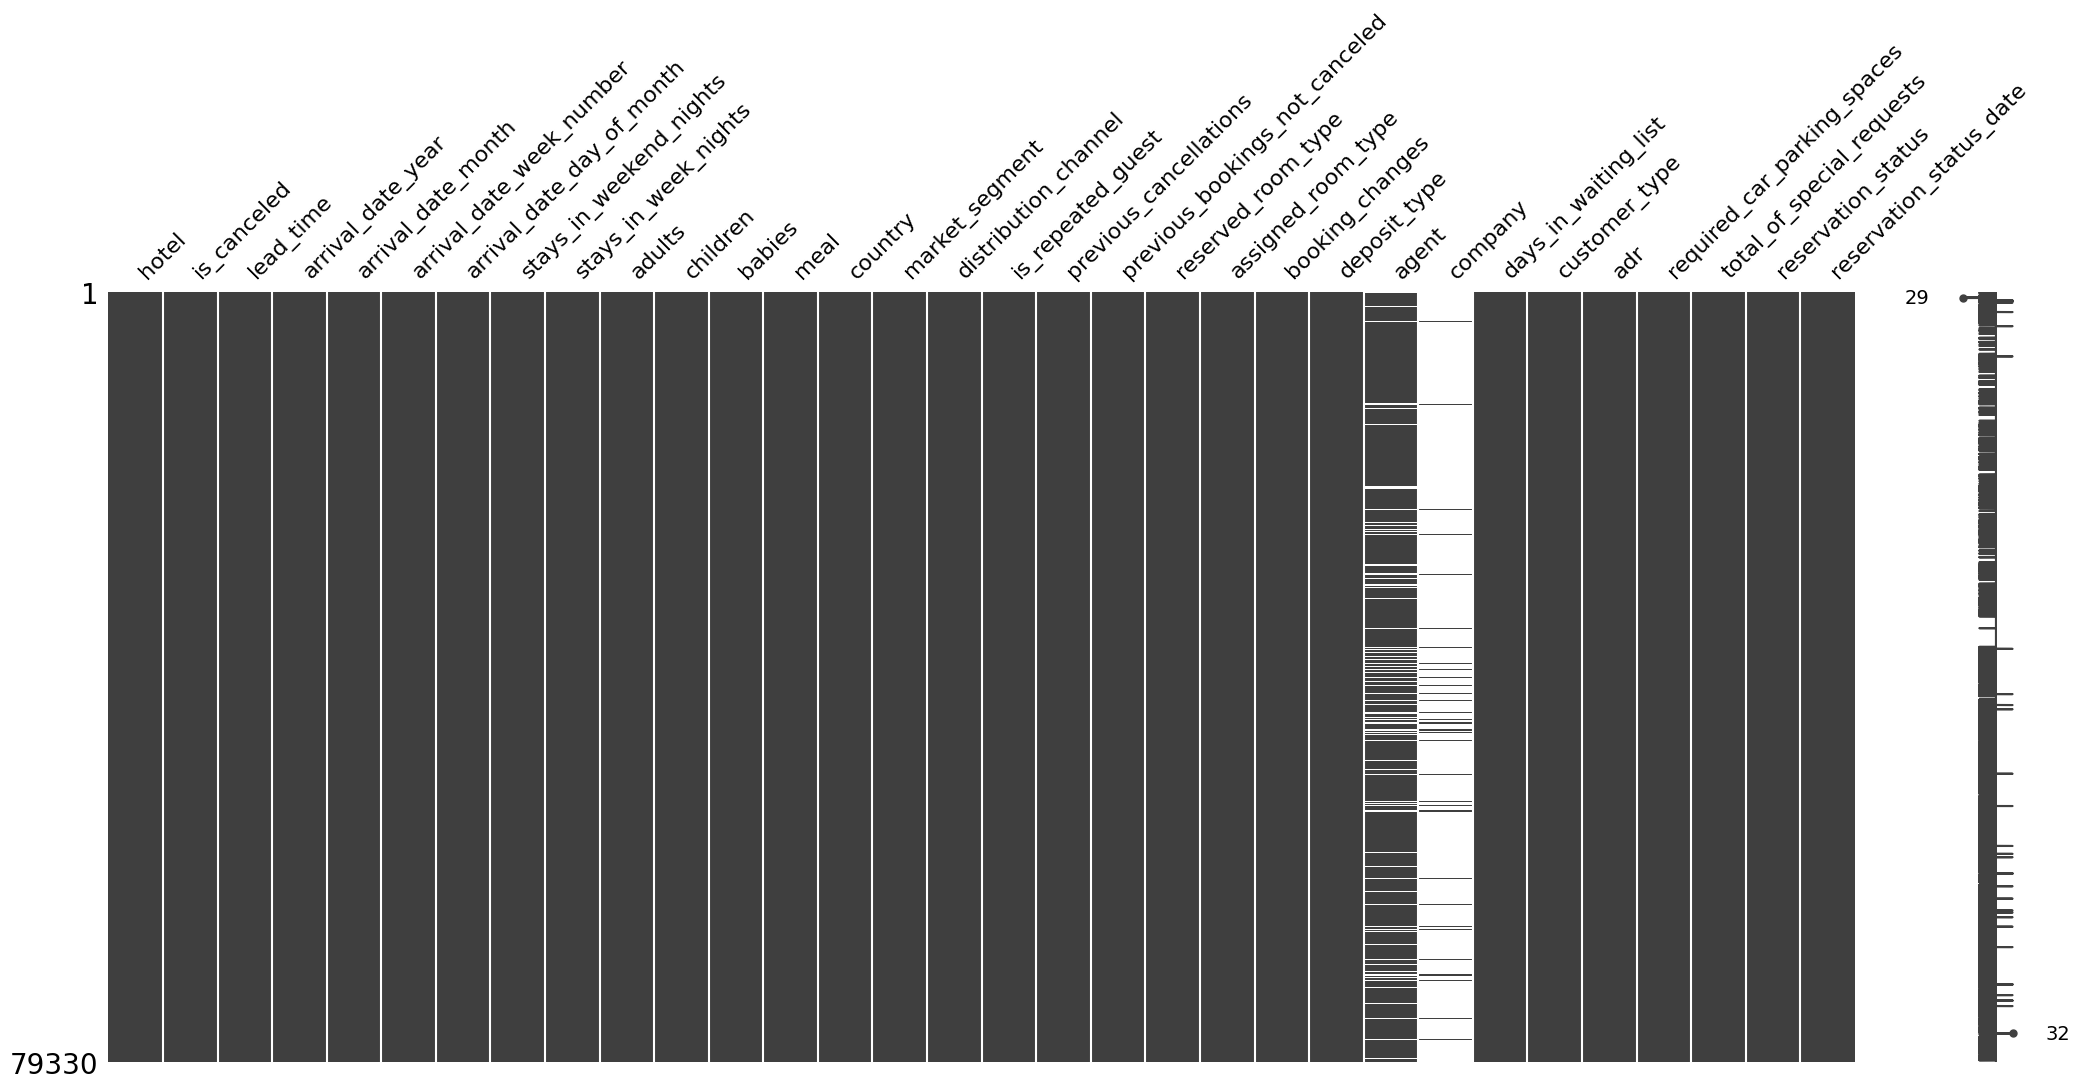

In [185]:
import missingno as msno

msno.matrix(bookings)

Indeed, we can observe that majority of the _company_ column have missing entries, so as the _agent_ column. Hence, we remove these columns together with the _hotel_ column since all bookings in our working dataset are for the city hotel.

<Axes: >

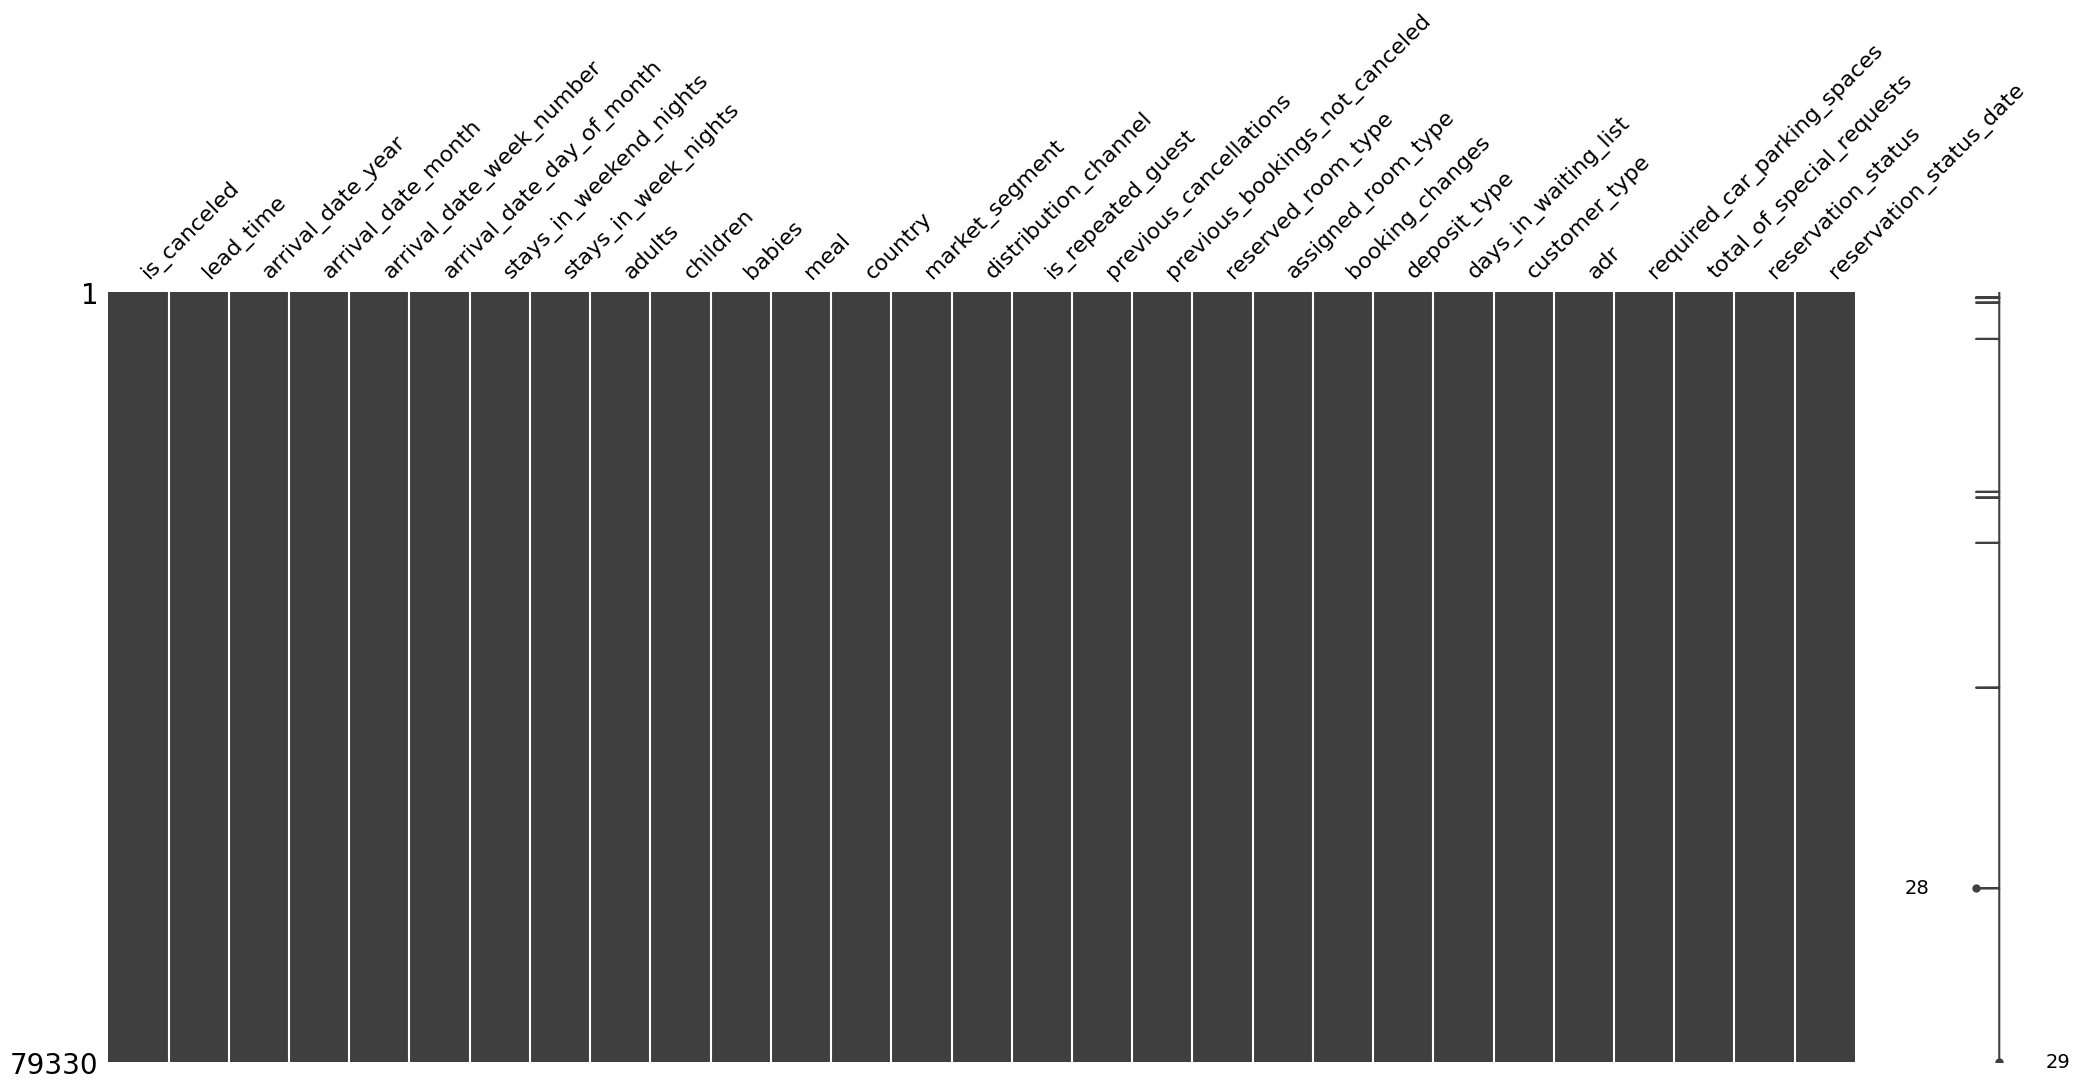

In [186]:
bookings = bookings.drop(columns=['hotel', 'agent', 'company'])
msno.matrix(bookings)

Looking at null values once again.

In [187]:
bookings.isnull().sum().sort_values(ascending=False)  # no. of not Null instances per column

country                           24
children                           4
arrival_date_year                  0
lead_time                          0
is_canceled                        0
arrival_date_week_number           0
arrival_date_month                 0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
adults                             0
stays_in_week_nights               0
babies                             0
meal                               0
market_segment                     0
distribution_channel               0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_canceled     0
reserved_room_type                 0
assigned_room_type                 0
booking_changes                    0
deposit_type                       0
days_in_waiting_list               0
customer_type                      0
adr                                0
required_car_parking_spaces        0
total_of_special_requests          0
r

Observe that we are still missing entries for the _country_ and _children_ columns. To address this, we remove the bookings with missing entries.

In [188]:
bookings = bookings.dropna(axis=0)
bookings.isnull().sum().sort_values(ascending=False)

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Invalid Data

All our bookings now have complete entries. Let's look at some sample bookings and the dataframe summary.

In [189]:
bookings.head(15)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,0,6,2015,July,27,1,0,2,1,0.0,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,1,88,2015,July,27,1,0,4,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,1,65,2015,July,27,1,0,4,1,0.0,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,1,92,2015,July,27,1,2,4,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,1,100,2015,July,27,2,0,2,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
40065,1,79,2015,July,27,2,0,3,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-06-25
40066,0,3,2015,July,27,2,0,3,1,0.0,...,A,1,No Deposit,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
40067,1,63,2015,July,27,2,1,3,1,0.0,...,A,0,No Deposit,0,Transient,68.00,0,0,Canceled,2015-06-25
40068,1,62,2015,July,27,2,2,3,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02
40069,1,62,2015,July,27,2,2,3,2,0.0,...,A,0,No Deposit,0,Transient,76.50,0,1,No-Show,2015-07-02


In [190]:
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000,79302.000000
mean,0.417089,109.740183,2016.174535,27.173564,15.787824,0.795339,2.182896,1.851126,0.091397,0.004943,0.025624,0.079771,0.132418,0.187435,3.227914,105.326470,0.024375,0.547035
std,0.493081,110.953223,0.699042,13.397803,8.729345,0.884985,1.456096,0.509013,0.372230,0.084338,0.158010,0.415543,1.693708,0.608718,20.874486,43.590608,0.154946,0.780835
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


Notice that the minimum number of adult in a booking is 0. This means that there are hotel bookings where there are no accompanying adult which is definitely unlikely. Hence, we remove these bookings from our dataset.

In [191]:
bookings.drop(bookings[bookings['adults']==0].index, inplace=True)

bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000,78920.000000
mean,0.417854,109.835441,2016.174341,27.173175,15.785821,0.793715,2.179549,1.860086,0.086100,0.004929,0.025038,0.080043,0.132729,0.183553,3.241434,105.583440,0.024392,0.545679
std,0.493209,111.005596,0.699438,13.388921,8.729623,0.878565,1.432816,0.493641,0.358272,0.084318,0.156242,0.416334,1.697213,0.586136,20.920086,43.405031,0.155001,0.780073
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,14.000000,34.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,18.000000,391.000000,5400.000000,3.000000,5.000000


Now, we also observe that there are also bookings having 10 babies, 21 previous cancellations, 21 booking changes, and 5400 adr which are unlikely. This means that there are possible outliers in the dataset.

## Feature Engineering

Now, since our objective is to obtain frequent patterns in the hotel bookings, we want to know more about which attributes come along together more often. To do this, let's first discreticize, add, and delete some attributes from our dataset. The summary of which are given below.

__Attributes to Discreticize__
1. lead_time: Very Short (0-7), Short (8-30), Medium (31-90), Long (91-180), Very Long (181+)
2. is_repeated_guest: Yes (1), No (0)
3. previous_cancellations: Not Canceled (0), One Canceled (1), Multiple Canceled (2+)
4. booking_changes: No Changes (0), One Change (1), Multiple Changes (2+)
5. days_in_waiting_list: Instant (0), Short Wait (1-7), Medium Wait (8-30), Long Wait (31+)
6. adr: Low (0-49), Medium (50-150), High (151+)
7. total_of_special_requests: No Request (0), Some Requests (1-2), Many Requests (3+)

__New Attributes__
1. occupants: obtained from adults, children, and babies attributes
    - discretization: Adults, Adults/Children, Adults/Babies, Children, Children/Babies
2. stay_duration: stays_in_week_nights + stays_in_weekend_nights
    - discretization: Short Stay (1-2), Medium Stay (3-5), Long Stay (6+)
3. stay_nights: obtained from stays_in_week_nights and stays_in_weekend_nights
    - discretization: Weekend, Weekdays, Mixed
4. room_upgrade: obtained from assigned_room_type and reserved_room_type
    - discretization: Yes, No

In [192]:
# compute for new attributes

# stay_duration
bookings['stay_duration'] = bookings['stays_in_weekend_nights'] + bookings['stays_in_week_nights']

# stay_nights
stay_nights = []
for _, b in bookings.iterrows():
    if b.loc['stays_in_week_nights'] > 0 and b.loc['stays_in_weekend_nights'] > 0:
        stay_nights.append('Mixed')
        continue

    if b.loc['stays_in_week_nights'] > 0:
        stay_nights.append('Weekdays')
    else:
        stay_nights.append('Weekend')
bookings['stay_nights'] = stay_nights

# room_upgrade
room_upgrade = []
for _, b in bookings.iterrows():
    if b.loc['assigned_room_type'] != b.loc['reserved_room_type']:
        room_upgrade.append('Yes')
    else:
        room_upgrade.append('No')
bookings['room_upgrade'] = room_upgrade

# occupants
occupants = []
for i, b in bookings.iterrows():
    occ = ''
    if int(b.loc['adults']) > 0:
        occ += 'Adults'
    if int(b.loc['children']) > 0:
        if len(occ) > 0:
            occ += '/'
        occ += 'Children'
    if int(b.loc['babies']) > 0:
        if len(occ) > 0:
            occ += '/'
        occ += 'Babies'
    
    if occ == '':
        occ += 'Unknown'
    occupants.append(occ)
bookings['occupants'] = occupants

In [193]:
# discretization of attributes

# lead_time
bins = [-float('inf'), 7, 30, 90, 180, float('inf')]
bookings['lead_time'] = pd.cut(bookings['lead_time'], bins=bins, 
                               labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], 
                               right=True)

# is_repeated_guest
bookings['is_repeated_guest'] = bookings['is_repeated_guest'].map({1: 'Yes', 0: 'No'})

# previous_cancellations and booking_changes
bins = [-float('inf'), 0, 1, float('inf')]
bookings['previous_cancellations'] = pd.cut(bookings['previous_cancellations'], bins=bins, 
                                            labels=['Not Cancelled', 'One Cancelled', 'Multiple Cancelled'], 
                                            right=True)
bookings['booking_changes'] = pd.cut(bookings['booking_changes'], bins=bins,
                                     labels=['No Changes', 'One Change', 'Multiple Changes'],
                                     right=True)

# days_in_waiting_list
bins = [-float('inf'), 0, 7, 30, float('inf')]
bookings['days_in_waiting_list'] = pd.cut(bookings['days_in_waiting_list'], bins=bins,
                                          labels=['Instant', 'Short Wait', 'Medium Wait', 'Long Wait'],
                                          right=True)

# adr
bins = [-float('inf'), 50, 150, float('inf')]
bookings['adr'] = pd.cut(bookings['adr'], bins=bins,
                         labels=['Low', 'Medium', 'High'])

# total_of_special_requests
bins = [-float('inf'), 0, 2, float('inf')]
bookings['total_of_special_requests'] = pd.cut(bookings['total_of_special_requests'], bins=bins,
                                               labels=['No Request', 'Some Requests', 'Many Requests'],
                                               right=True)

# stay_duration
bins = [-float('inf'), 2, 5, float('inf')]
bookings['stay_duration'] = pd.cut(bookings['stay_duration'], bins=bins,
                                   labels=['Short Stay', 'Medium Stay', 'Long Stay'])

Let's now look at the columns of our dataset.

In [194]:
bookings.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'stay_duration',
       'stay_nights', 'room_upgrade', 'occupants'],
      dtype='object')

We will now remove the columns that we have incorporated into our new attributes as well as some attributes that we think will not be useful in our analysis.

In [195]:
# columns to remove
rem_cols = ['is_canceled', 'arrival_date_year', 'arrival_date_day_of_month', 'meal', 
            'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
            'previous_bookings_not_canceled', 'required_car_parking_spaces',
            'reserved_room_type', 'customer_type', 'reservation_status_date']

bookings = bookings.drop(columns=rem_cols)

bookings.head(15)

,lead_time,arrival_date_month,arrival_date_week_number,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,total_of_special_requests,reservation_status,stay_duration,stay_nights,room_upgrade,occupants
40060,Very Short,July,27,PRT,Offline TA/TO,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Low,No Request,Check-Out,Short Stay,Weekdays,No,Adults
40061,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,Canceled,Medium Stay,Weekdays,No,Adults
40062,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,Canceled,Medium Stay,Weekdays,No,Adults
40063,Long,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,Canceled,Long Stay,Mixed,No,Adults
40064,Long,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,Canceled,Short Stay,Weekdays,No,Adults
40065,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,Canceled,Medium Stay,Weekdays,No,Adults
40066,Very Short,July,27,PRT,Groups,TA/TO,No,Not Cancelled,A,One Change,No Deposit,Instant,Medium,No Request,Check-Out,Medium Stay,Weekdays,No,Adults
40067,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,No Request,Canceled,Medium Stay,Mixed,No,Adults
40068,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,No-Show,Medium Stay,Mixed,No,Adults
40069,Medium,July,27,PRT,Online TA,TA/TO,No,Not Cancelled,A,No Changes,No Deposit,Instant,Medium,Some Requests,No-Show,Medium Stay,Mixed,No,Adults


Some final checks for missing values.

In [196]:
bookings.isnull().sum().sort_values(ascending=False)

lead_time                    0
arrival_date_month           0
arrival_date_week_number     0
country                      0
market_segment               0
distribution_channel         0
is_repeated_guest            0
previous_cancellations       0
assigned_room_type           0
booking_changes              0
deposit_type                 0
days_in_waiting_list         0
adr                          0
total_of_special_requests    0
reservation_status           0
stay_duration                0
stay_nights                  0
room_upgrade                 0
occupants                    0
dtype: int64

## Export Dataset

In [197]:
bookings.to_csv('./resources/cleaned_hotel_bookings.csv')